# 01. Analysis Seoul CCTV

## 1. 데이터 읽기

In [4]:
import pandas as pd

In [5]:
# !conda install -y pandas  #설치 안될 떄

In [6]:
# Pandas 이용해 파일 불러오기 (경로, 한글 인코딩)
CCTV_Seoul = pd.read_csv("../data/01. Seoul_CCTV.csv", encoding="utf-8")  # 한글 깨질 때

In [7]:
CCTV_Seoul.head() # 상단 5개 불러오기(기본)

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [8]:
CCTV_Seoul.head(3) # 상단 3개 불러오기

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204


In [9]:
CCTV_Seoul.tail() # 전체 데이터 파악 가능 => 25개 데이터 있음 

,기관명,소계,2013년도 이전,2014년,2015년,2016년
20,용산구,2096,1368,218,112,398
21,은평구,2108,1138,224,278,468
22,종로구,1619,464,314,211,630
23,중구,1023,413,190,72,348
24,중랑구,916,509,121,177,109


In [10]:
CCTV_Seoul.columns 

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [11]:
CCTV_Seoul.columns[0]

'기관명'

In [12]:
# 컬럼명 바꿔서 보여줌(데이터변경X)
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0]:"구별"})

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613
5,광진구,878,573,78,53,174
6,구로구,1884,1142,173,246,323
7,금천구,1348,674,51,269,354
8,노원구,1566,542,57,451,516
9,도봉구,825,238,159,42,386


In [13]:
CCTV_Seoul.columns[0]

'기관명'

In [14]:
# 데이터까지 바꾸러면 inplace=True
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0]:"구별"}, inplace=True)

In [15]:
CCTV_Seoul.columns[0]

'구별'

In [16]:
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [17]:
# 필요한 데이터만 불러올 때, 옵션 지정하기
pop_Seoul = pd.read_excel(
        "../data/01. Seoul_Population.xls", header=2, usecols="B, D, G, J, N"
)

In [18]:
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10124579,9857426,267153,1365126
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273


In [19]:
pop_Seoul.rename(
    columns={
        pop_Seoul.columns[0]:"구별",
        pop_Seoul.columns[1]:"인구수",
        pop_Seoul.columns[2]:"한국인",
        pop_Seoul.columns[3]:"외국인",
        pop_Seoul.columns[4]:"고령자"
    },
    inplace=True,
)

pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10124579,9857426,267153,1365126
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273


---------------------------------------------------------------------------------------------------------

## Pandas 기초 
- Python에서 R 만큼의 강력한 데이터 핸들링 성능을 제공하는 모듈
- 단일 프로세스에서는 최대 효율
- 코딩 가능하고 응용 가능한 엑셀로 받아들여도 됨
- 누군가 스테로이드를 맞은 엑셀이라고 함 

### Series 
- index와 value로 이루어져 있습니다.
- 한 가지 데이터 타입만 가질 수 있습니다. 

In [20]:
import pandas as pd
import numpy as np

- pandas는 통상 pd
- numpy는 통상 np

In [21]:
pd.Series() #시리즈 데이터 만들기

/var/folders/93/7k3h7y912r908nn6zty4dmrr0000gn/T/ipykernel_3101/1797094775.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.Series() #시리즈 데이터 만들기


Series([], dtype: float64)

In [22]:
pd.Series([1, 2, 3, 4])

0    1
1    2
2    3
3    4
dtype: int64

In [25]:
pd.Series([1, 2, 3, 4], dtype=float64)  # np.빠짐

NameError: name 'float64' is not defined

In [26]:
pd.Series([1, 2, 3, 4], dtype=np.float64) 

0    1.0
1    2.0
2    3.0
3    4.0
dtype: float64

In [27]:
pd.Series([1, 2, 3, 4], dtype=str)  # dtpye : object = string 

0    1
1    2
2    3
3    4
dtype: object

In [28]:
pd.Series(np.array([1, 2, 3]))

0    1
1    2
2    3
dtype: int64

In [29]:
pd.Series({"key":"value"})

key    value
dtype: object

In [30]:
data = pd.Series([1, 2, 3, 4, "5"])
data

0    1
1    2
2    3
3    4
4    5
dtype: object

In [31]:
# 짝수를 찾고 싶다 ? 
# not all arguments converted during string formatting
data % 2

TypeError: not all arguments converted during string formatting

In [32]:
data = pd.Series([1, 2, 3, 4])
data

0    1
1    2
2    3
3    4
dtype: int64

In [33]:
data % 2 

0    1
1    0
2    1
3    0
dtype: int64

### 날짜 데이터

In [34]:
dates = pd.date_range("20230101", periods=6)  # 6일
dates

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06'],
              dtype='datetime64[ns]', freq='D')

### DataFrame
- pd.Series()
    - index, value
- pd.DateFrame()
    - index, value, column

In [35]:
# 표준정규분포에서 샘플링한 난수 생성
data = np.random.rand(6, 4)
data

array([[0.1807182 , 0.19298432, 0.1498695 , 0.98181385],
       [0.66169301, 0.88804179, 0.58798676, 0.72075703],
       [0.66937424, 0.71318192, 0.99173877, 0.30054825],
       [0.66644945, 0.35356782, 0.33589291, 0.15410122],
       [0.23619881, 0.91433099, 0.72471031, 0.50414205],
       [0.53868754, 0.34936579, 0.9722079 , 0.12556651]])

In [36]:
df = pd.DataFrame(data, index=dates, columns=["A", "B", "C", "D"])
df

,A,B,C,D
2023-01-01,0.180718,0.192984,0.149870,0.981814
2023-01-02,0.661693,0.888042,0.587987,0.720757
2023-01-03,0.669374,0.713182,0.991739,0.300548
2023-01-04,0.666449,0.353568,0.335893,0.154101
2023-01-05,0.236199,0.914331,0.724710,0.504142
2023-01-06,0.538688,0.349366,0.972208,0.125567


### 데이터 프레임 정보 탐색
- df.haed()

In [37]:
df.head()

,A,B,C,D
2023-01-01,0.180718,0.192984,0.149870,0.981814
2023-01-02,0.661693,0.888042,0.587987,0.720757
2023-01-03,0.669374,0.713182,0.991739,0.300548
2023-01-04,0.666449,0.353568,0.335893,0.154101
2023-01-05,0.236199,0.914331,0.724710,0.504142


- df.tail()

In [38]:
df.tail()

,A,B,C,D
2023-01-02,0.661693,0.888042,0.587987,0.720757
2023-01-03,0.669374,0.713182,0.991739,0.300548
2023-01-04,0.666449,0.353568,0.335893,0.154101
2023-01-05,0.236199,0.914331,0.724710,0.504142
2023-01-06,0.538688,0.349366,0.972208,0.125567


- df.index

In [39]:
df.index

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06'],
              dtype='datetime64[ns]', freq='D')

- df.columns

In [40]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

- df.values

In [41]:
df.values

array([[0.1807182 , 0.19298432, 0.1498695 , 0.98181385],
       [0.66169301, 0.88804179, 0.58798676, 0.72075703],
       [0.66937424, 0.71318192, 0.99173877, 0.30054825],
       [0.66644945, 0.35356782, 0.33589291, 0.15410122],
       [0.23619881, 0.91433099, 0.72471031, 0.50414205],
       [0.53868754, 0.34936579, 0.9722079 , 0.12556651]])

- df.info() : 데이터 프레임의 기본 정보 확인

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2023-01-01 to 2023-01-06
Freq: D
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       6 non-null      float64
 1   B       6 non-null      float64
 2   C       6 non-null      float64
 3   D       6 non-null      float64
dtypes: float64(4)
memory usage: 240.0 bytes


- df.describe() : 데이터 프레임의 기술통계 정보 확인

In [43]:
df.describe() 

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.492187,0.568579,0.627068,0.464488
std,0.225920,0.309149,0.339314,0.338513
min,0.180718,0.192984,0.149870,0.125567
25%,0.311821,0.350416,0.398916,0.190713
50%,0.600190,0.533375,0.656349,0.402345
75%,0.665260,0.844327,0.910334,0.666603
max,0.669374,0.914331,0.991739,0.981814


### 데이터 정렬
- sort_values()
- 특정 컬럼(열)을 기준으로 데이터를 정렬합니다. 

In [44]:
df

,A,B,C,D
2023-01-01,0.180718,0.192984,0.149870,0.981814
2023-01-02,0.661693,0.888042,0.587987,0.720757
2023-01-03,0.669374,0.713182,0.991739,0.300548
2023-01-04,0.666449,0.353568,0.335893,0.154101
2023-01-05,0.236199,0.914331,0.724710,0.504142
2023-01-06,0.538688,0.349366,0.972208,0.125567


In [50]:
df.sort_values(by="B", ascending=False, inplace=True)

In [51]:
df

,A,B,C,D
2023-01-05,0.236199,0.914331,0.724710,0.504142
2023-01-02,0.661693,0.888042,0.587987,0.720757
2023-01-03,0.669374,0.713182,0.991739,0.300548
2023-01-04,0.666449,0.353568,0.335893,0.154101
2023-01-06,0.538688,0.349366,0.972208,0.125567
2023-01-01,0.180718,0.192984,0.149870,0.981814


### 데이터 선택

In [52]:
df

,A,B,C,D
2023-01-05,0.236199,0.914331,0.724710,0.504142
2023-01-02,0.661693,0.888042,0.587987,0.720757
2023-01-03,0.669374,0.713182,0.991739,0.300548
2023-01-04,0.666449,0.353568,0.335893,0.154101
2023-01-06,0.538688,0.349366,0.972208,0.125567
2023-01-01,0.180718,0.192984,0.149870,0.981814


In [53]:
# 한 개 컬럼 선택
df["A"]

2023-01-05    0.236199
2023-01-02    0.661693
2023-01-03    0.669374
2023-01-04    0.666449
2023-01-06    0.538688
2023-01-01    0.180718
Name: A, dtype: float64

In [54]:
type(df["A"])

pandas.core.series.Series

In [56]:
df.A # 컬럼보기 / only 문자열만 가능 

2023-01-05    0.236199
2023-01-02    0.661693
2023-01-03    0.669374
2023-01-04    0.666449
2023-01-06    0.538688
2023-01-01    0.180718
Name: A, dtype: float64

In [62]:
df = pd.DataFrame(data, index=dates, columns=["A", "B", "C", "D"])
df

,A,B,C,D
2023-01-01,0.180718,0.192984,0.149870,0.981814
2023-01-02,0.661693,0.888042,0.587987,0.720757
2023-01-03,0.669374,0.713182,0.991739,0.300548
2023-01-04,0.666449,0.353568,0.335893,0.154101
2023-01-05,0.236199,0.914331,0.724710,0.504142
2023-01-06,0.538688,0.349366,0.972208,0.125567


In [63]:
df.D

2023-01-01    0.981814
2023-01-02    0.720757
2023-01-03    0.300548
2023-01-04    0.154101
2023-01-05    0.504142
2023-01-06    0.125567
Freq: D, Name: D, dtype: float64

In [65]:
# 두 개 이상 컬럼 선택
df[["A", "B"]]# 리스트 형태

,A,B
2023-01-01,0.180718,0.192984
2023-01-02,0.661693,0.888042
2023-01-03,0.669374,0.713182
2023-01-04,0.666449,0.353568
2023-01-05,0.236199,0.914331
2023-01-06,0.538688,0.349366


### offset index
- [n:m] : n부터 m-1 까지
- 인덱스나 컬럼의 이름으로 slice 하는 경우는 끝을 포함합니다.

In [66]:
df

,A,B,C,D
2023-01-01,0.180718,0.192984,0.149870,0.981814
2023-01-02,0.661693,0.888042,0.587987,0.720757
2023-01-03,0.669374,0.713182,0.991739,0.300548
2023-01-04,0.666449,0.353568,0.335893,0.154101
2023-01-05,0.236199,0.914331,0.724710,0.504142
2023-01-06,0.538688,0.349366,0.972208,0.125567


In [67]:
df[0:3]

,A,B,C,D
2023-01-01,0.180718,0.192984,0.149870,0.981814
2023-01-02,0.661693,0.888042,0.587987,0.720757
2023-01-03,0.669374,0.713182,0.991739,0.300548


In [68]:
df["20230101":"20230104"] #이름으로 선택

,A,B,C,D
2023-01-01,0.180718,0.192984,0.149870,0.981814
2023-01-02,0.661693,0.888042,0.587987,0.720757
2023-01-03,0.669374,0.713182,0.991739,0.300548
2023-01-04,0.666449,0.353568,0.335893,0.154101


- loc : location
- index 이름으로 특정 행, 열을 선택합니다.

In [71]:
df.loc[:, ["A", "B"]]  #인덱스 전부, a-b 컬럼만 가져와라

,A,B
2023-01-01,0.180718,0.192984
2023-01-02,0.661693,0.888042
2023-01-03,0.669374,0.713182
2023-01-04,0.666449,0.353568
2023-01-05,0.236199,0.914331
2023-01-06,0.538688,0.349366


In [72]:
df.loc["20230101":"20230104", ["A", "D"]]

,A,D
2023-01-01,0.180718,0.981814
2023-01-02,0.661693,0.720757
2023-01-03,0.669374,0.300548
2023-01-04,0.666449,0.154101


In [73]:
df.loc["20230101":"20230104", "A":"D"]

,A,B,C,D
2023-01-01,0.180718,0.192984,0.149870,0.981814
2023-01-02,0.661693,0.888042,0.587987,0.720757
2023-01-03,0.669374,0.713182,0.991739,0.300548
2023-01-04,0.666449,0.353568,0.335893,0.154101


In [74]:
df

,A,B,C,D
2023-01-01,0.180718,0.192984,0.149870,0.981814
2023-01-02,0.661693,0.888042,0.587987,0.720757
2023-01-03,0.669374,0.713182,0.991739,0.300548
2023-01-04,0.666449,0.353568,0.335893,0.154101
2023-01-05,0.236199,0.914331,0.724710,0.504142
2023-01-06,0.538688,0.349366,0.972208,0.125567


In [75]:
df.loc["20230102", ["A", "B"]]

A    0.661693
B    0.888042
Name: 2023-01-02 00:00:00, dtype: float64

- iloc : inter location
    - 컴퓨터가 인식하는 인덱스 값으로 선택

In [76]:
df

,A,B,C,D
2023-01-01,0.180718,0.192984,0.149870,0.981814
2023-01-02,0.661693,0.888042,0.587987,0.720757
2023-01-03,0.669374,0.713182,0.991739,0.300548
2023-01-04,0.666449,0.353568,0.335893,0.154101
2023-01-05,0.236199,0.914331,0.724710,0.504142
2023-01-06,0.538688,0.349366,0.972208,0.125567


In [77]:
df.iloc[3]

A    0.666449
B    0.353568
C    0.335893
D    0.154101
Name: 2023-01-04 00:00:00, dtype: float64

In [78]:
df.iloc[3,2]

0.3358929075192013

In [79]:
df.iloc[3:5, 0:2]

,A,B
2023-01-04,0.666449,0.353568
2023-01-05,0.236199,0.914331


In [80]:
df

,A,B,C,D
2023-01-01,0.180718,0.192984,0.149870,0.981814
2023-01-02,0.661693,0.888042,0.587987,0.720757
2023-01-03,0.669374,0.713182,0.991739,0.300548
2023-01-04,0.666449,0.353568,0.335893,0.154101
2023-01-05,0.236199,0.914331,0.724710,0.504142
2023-01-06,0.538688,0.349366,0.972208,0.125567


In [81]:
df.iloc[[1,2,4], [0,2]]

,A,C
2023-01-02,0.661693,0.587987
2023-01-03,0.669374,0.991739
2023-01-05,0.236199,0.724710


In [82]:
df.iloc[:, 1:3]

,B,C
2023-01-01,0.192984,0.149870
2023-01-02,0.888042,0.587987
2023-01-03,0.713182,0.991739
2023-01-04,0.353568,0.335893
2023-01-05,0.914331,0.724710
2023-01-06,0.349366,0.972208


### condition

In [83]:
df

,A,B,C,D
2023-01-01,0.180718,0.192984,0.149870,0.981814
2023-01-02,0.661693,0.888042,0.587987,0.720757
2023-01-03,0.669374,0.713182,0.991739,0.300548
2023-01-04,0.666449,0.353568,0.335893,0.154101
2023-01-05,0.236199,0.914331,0.724710,0.504142
2023-01-06,0.538688,0.349366,0.972208,0.125567


In [84]:
# A 컬럼에서 0보다 큰 숫자(양수)만 선택 

df["A"] > 0

2023-01-01    True
2023-01-02    True
2023-01-03    True
2023-01-04    True
2023-01-05    True
2023-01-06    True
Freq: D, Name: A, dtype: bool

In [86]:
df[df["A"] > 0]

,A,B,C,D
2023-01-01,0.180718,0.192984,0.149870,0.981814
2023-01-02,0.661693,0.888042,0.587987,0.720757
2023-01-03,0.669374,0.713182,0.991739,0.300548
2023-01-04,0.666449,0.353568,0.335893,0.154101
2023-01-05,0.236199,0.914331,0.724710,0.504142
2023-01-06,0.538688,0.349366,0.972208,0.125567


In [87]:
df[df > 0]

,A,B,C,D
2023-01-01,0.180718,0.192984,0.149870,0.981814
2023-01-02,0.661693,0.888042,0.587987,0.720757
2023-01-03,0.669374,0.713182,0.991739,0.300548
2023-01-04,0.666449,0.353568,0.335893,0.154101
2023-01-05,0.236199,0.914331,0.724710,0.504142
2023-01-06,0.538688,0.349366,0.972208,0.125567


- Nan : Not a number

### 컬럼 추가
- 기존 컬럼이 없으면 새로 추가
- 기존 컬럼이 있으면 수정

In [88]:
df

,A,B,C,D
2023-01-01,0.180718,0.192984,0.149870,0.981814
2023-01-02,0.661693,0.888042,0.587987,0.720757
2023-01-03,0.669374,0.713182,0.991739,0.300548
2023-01-04,0.666449,0.353568,0.335893,0.154101
2023-01-05,0.236199,0.914331,0.724710,0.504142
2023-01-06,0.538688,0.349366,0.972208,0.125567


In [107]:
df["E"] = ["one", "one", "two", "three", "four", "seven"]
df

,A,B,C,D,E
2023-01-01,0.180718,0.192984,0.149870,0.981814,one
2023-01-02,0.661693,0.888042,0.587987,0.720757,one
2023-01-03,0.669374,0.713182,0.991739,0.300548,two
2023-01-04,0.666449,0.353568,0.335893,0.154101,three
2023-01-05,0.236199,0.914331,0.724710,0.504142,four
2023-01-06,0.538688,0.349366,0.972208,0.125567,seven


- isin()
- 특정 요소가 있는지 확인

In [108]:
df["E"].isin(["two"])

2023-01-01    False
2023-01-02    False
2023-01-03     True
2023-01-04    False
2023-01-05    False
2023-01-06    False
Freq: D, Name: E, dtype: bool

In [109]:
df["E"].isin(["two", "five"])

2023-01-01    False
2023-01-02    False
2023-01-03     True
2023-01-04    False
2023-01-05    False
2023-01-06    False
Freq: D, Name: E, dtype: bool

In [110]:
df["E"].isin(["two", "five", "three"])

2023-01-01    False
2023-01-02    False
2023-01-03     True
2023-01-04     True
2023-01-05    False
2023-01-06    False
Freq: D, Name: E, dtype: bool

In [111]:
df[df["E"].isin(["two", "five", "three"])]

,A,B,C,D,E
2023-01-03,0.669374,0.713182,0.991739,0.300548,two
2023-01-04,0.666449,0.353568,0.335893,0.154101,three


### 특정 컬럼 제거
- del 
- drop

In [112]:
df

,A,B,C,D,E
2023-01-01,0.180718,0.192984,0.149870,0.981814,one
2023-01-02,0.661693,0.888042,0.587987,0.720757,one
2023-01-03,0.669374,0.713182,0.991739,0.300548,two
2023-01-04,0.666449,0.353568,0.335893,0.154101,three
2023-01-05,0.236199,0.914331,0.724710,0.504142,four
2023-01-06,0.538688,0.349366,0.972208,0.125567,seven


In [113]:
del df["E"]
df

,A,B,C,D
2023-01-01,0.180718,0.192984,0.149870,0.981814
2023-01-02,0.661693,0.888042,0.587987,0.720757
2023-01-03,0.669374,0.713182,0.991739,0.300548
2023-01-04,0.666449,0.353568,0.335893,0.154101
2023-01-05,0.236199,0.914331,0.724710,0.504142
2023-01-06,0.538688,0.349366,0.972208,0.125567


In [115]:
df.drop(["D"], axis=1)

,A,B,C
2023-01-01,0.180718,0.192984,0.149870
2023-01-02,0.661693,0.888042,0.587987
2023-01-03,0.669374,0.713182,0.991739
2023-01-04,0.666449,0.353568,0.335893
2023-01-05,0.236199,0.914331,0.724710
2023-01-06,0.538688,0.349366,0.972208


In [116]:
df.drop(["20230104"])

,A,B,C,D
2023-01-01,0.180718,0.192984,0.149870,0.981814
2023-01-02,0.661693,0.888042,0.587987,0.720757
2023-01-03,0.669374,0.713182,0.991739,0.300548
2023-01-05,0.236199,0.914331,0.724710,0.504142
2023-01-06,0.538688,0.349366,0.972208,0.125567


### apply()
- 데이터 프레임에 일괄적으로 함수 적용

In [118]:
df

,A,B,C,D
2023-01-01,0.180718,0.192984,0.149870,0.981814
2023-01-02,0.661693,0.888042,0.587987,0.720757
2023-01-03,0.669374,0.713182,0.991739,0.300548
2023-01-04,0.666449,0.353568,0.335893,0.154101
2023-01-05,0.236199,0.914331,0.724710,0.504142
2023-01-06,0.538688,0.349366,0.972208,0.125567


In [120]:
# a열에 일괄적인 합 보여주기
df["A"].apply("sum")

2.953121256088396

In [121]:
df["A"].apply("mean")

0.4921868760147327

In [122]:
df["A"].apply("max")

0.6693742449454427

In [123]:
df["A"].apply("min")

0.18071819682641743

In [124]:
df[["A","D"]].apply("sum")

A    2.953121
D    2.786929
dtype: float64

In [126]:
df["A"].apply(np.sum)

2023-01-01    0.180718
2023-01-02    0.661693
2023-01-03    0.669374
2023-01-04    0.666449
2023-01-05    0.236199
2023-01-06    0.538688
Freq: D, Name: A, dtype: float64

In [127]:
df["A"].apply(np.mean)

2023-01-01    0.180718
2023-01-02    0.661693
2023-01-03    0.669374
2023-01-04    0.666449
2023-01-05    0.236199
2023-01-06    0.538688
Freq: D, Name: A, dtype: float64

In [128]:
df["A"].apply(np.std) # 표준편차

2023-01-01    0.0
2023-01-02    0.0
2023-01-03    0.0
2023-01-04    0.0
2023-01-05    0.0
2023-01-06    0.0
Freq: D, Name: A, dtype: float64

In [129]:
df.apply(np.sum)

A    2.953121
B    3.411473
C    3.762406
D    2.786929
dtype: float64

In [130]:
df

,A,B,C,D
2023-01-01,0.180718,0.192984,0.149870,0.981814
2023-01-02,0.661693,0.888042,0.587987,0.720757
2023-01-03,0.669374,0.713182,0.991739,0.300548
2023-01-04,0.666449,0.353568,0.335893,0.154101
2023-01-05,0.236199,0.914331,0.724710,0.504142
2023-01-06,0.538688,0.349366,0.972208,0.125567


In [131]:
def plusminus(num):
    return "plus" if num > 0 else "minus" 

In [132]:
df["A"].apply(plusminus)

2023-01-01    plus
2023-01-02    plus
2023-01-03    plus
2023-01-04    plus
2023-01-05    plus
2023-01-06    plus
Freq: D, Name: A, dtype: object

In [133]:
df["A"].apply(lambda num: "plus" if num > 0 else "minus")

2023-01-01    plus
2023-01-02    plus
2023-01-03    plus
2023-01-04    plus
2023-01-05    plus
2023-01-06    plus
Freq: D, Name: A, dtype: object

------------------------------------------------------------------------------------------------------------

## 2. CCTV 데이터 훑어보기

In [134]:
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [135]:
CCTV_Seoul.tail()

,구별,소계,2013년도 이전,2014년,2015년,2016년
20,용산구,2096,1368,218,112,398
21,은평구,2108,1138,224,278,468
22,종로구,1619,464,314,211,630
23,중구,1023,413,190,72,348
24,중랑구,916,509,121,177,109


In [136]:
# CCTV 적은 순
CCTV_Seoul.sort_values(by="소계", ascending=True).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,825,238,159,42,386
2,강북구,831,369,120,138,204
5,광진구,878,573,78,53,174
3,강서구,911,388,258,184,81
24,중랑구,916,509,121,177,109


In [137]:
# # CCTV 많은 순
CCTV_Seoul.sort_values(by="소계", ascending=False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
18,양천구,2482,1843,142,30,467
14,서초구,2297,1406,157,336,398
4,관악구,2109,846,260,390,613
21,은평구,2108,1138,224,278,468


In [143]:
# 기존 컬럼이 없으면 추가, 있으면 수정 
CCTV_Seoul["최근증가율"] = (
    (CCTV_Seoul["2016년"] + CCTV_Seoul["2015년"] + CCTV_Seoul["2014년"]) / CCTV_Seoul["2013년도 이전"] * 100
)

CCTV_Seoul.sort_values(by="최근증가율", ascending=False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1619,464,314,211,630,248.922414
9,도봉구,825,238,159,42,386,246.638655
12,마포구,980,314,118,169,379,212.101911
8,노원구,1566,542,57,451,516,188.929889
1,강동구,1010,379,99,155,377,166.490765


## 3. 인구현황 데이터 훑어보기 

In [144]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10124579,9857426,267153,1365126
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273


In [145]:
pop_Seoul.tail()

,구별,인구수,한국인,외국인,고령자
21,관악구,520929,503297,17632,70046
22,서초구,445401,441102,4299,53205
23,강남구,561052,556164,4888,65060
24,송파구,671173,664496,6677,76582
25,강동구,440359,436223,4136,56161


In [146]:
## CCTV 데이터 보다 행이 많음 
pop_Seoul.drop([0], axis=0, inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273
5,광진구,372298,357703,14595,43953


In [148]:
pop_Seoul["구별"].unique() # 중복되지 않고 보여줌 

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [149]:
len(pop_Seoul["구별"].unique())

25

In [155]:
# 외국인비율, 고령자비율
pop_Seoul["외국인비율"] = pop_Seoul["외국인"] / pop_Seoul["인구수"] * 100
pop_Seoul["고령자비율"] = pop_Seoul["고령자"] / pop_Seoul["인구수"] * 100
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,164257,154770,9487,26182,5.775705,15.939656
2,중구,134593,125709,8884,21384,6.600640,15.887899
3,용산구,244444,229161,15283,36882,6.252148,15.088118
4,성동구,312711,304808,7903,41273,2.527254,13.198448
5,광진구,372298,357703,14595,43953,3.920247,11.805865


In [156]:
pop_Seoul.sort_values(["인구수"], ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,671173,664496,6677,76582,0.994825,11.410173
16,강서구,608255,601691,6564,76032,1.079153,12.500021
23,강남구,561052,556164,4888,65060,0.871220,11.596073
11,노원구,558075,554403,3672,74243,0.657976,13.303409
21,관악구,520929,503297,17632,70046,3.384722,13.446362


In [157]:
pop_Seoul.sort_values(["외국인"], ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402024,368550,33474,53981,8.326369,13.427308
17,구로구,441559,410742,30817,58794,6.979135,13.315095
18,금천구,253491,235154,18337,34170,7.233787,13.479769
21,관악구,520929,503297,17632,70046,3.384722,13.446362
6,동대문구,366011,350647,15364,55718,4.197688,15.223040


In [158]:
pop_Seoul.sort_values(["고령자"], ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,671173,664496,6677,76582,0.994825,11.410173
16,강서구,608255,601691,6564,76032,1.079153,12.500021
12,은평구,491202,486794,4408,74559,0.897390,15.178888
11,노원구,558075,554403,3672,74243,0.657976,13.303409
21,관악구,520929,503297,17632,70046,3.384722,13.446362


In [159]:
pop_Seoul.sort_values(["외국인비율"], ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402024,368550,33474,53981,8.326369,13.427308
18,금천구,253491,235154,18337,34170,7.233787,13.479769
17,구로구,441559,410742,30817,58794,6.979135,13.315095
2,중구,134593,125709,8884,21384,6.600640,15.887899
3,용산구,244444,229161,15283,36882,6.252148,15.088118


In [160]:
pop_Seoul.sort_values(["고령자비율"], ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,328002,324479,3523,56530,1.074079,17.234651
1,종로구,164257,154770,9487,26182,5.775705,15.939656
2,중구,134593,125709,8884,21384,6.600640,15.887899
10,도봉구,346234,344166,2068,53488,0.597284,15.448512
6,동대문구,366011,350647,15364,55718,4.197688,15.223040


------------------------------------------------------------------------------------------------------------

## 4. 두 데이터 합치기

### Pandas에서 데이터 프레임을 병합하는 방법
- pd.concat()
- pd.merge()
- pd.join()

In [ ]:
pd.merge(left, right)

In [163]:
# 딕셔너리 안에 리스트 형태

left = pd.DataFrame({
    "key" : ["K0", "K4", "K2", "K3"],
    "A" : ["A0", "A4", "A2", "A3"],
    "B" : ["B0", "B4", "B2", "B3"]
})

left

,key,A,B
0,K0,A0,B0
1,K4,A4,B4
2,K2,A2,B2
3,K3,A3,B3


In [164]:
# 리스트 안에 딕셔너리 형태

right = pd.DataFrame([
    {"key":"K0", "C":"C0", "D":"D0"},
    {"key":"K1", "C":"C1", "D":"D1"},
    {"key":"K2", "C":"C2", "D":"D2"},
    {"key":"K3", "C":"C3", "D":"D3"}
])
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


#### pd.merge()
- 두 데이터 프레임에서 컬럼이나 인덱스를 기준으로 잡고 병합하는 방법
- 기준이 되는 컬럼이나 인덱스를 키값이라고 합니다.
- 기준이 되는 키 값은 두 데이터 프레임에 모두 포함되어있어야 합니다.

In [165]:
pd.merge(left, right, how="inner", on="key")

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


In [166]:
pd.merge(left, right, how="left", on="key")

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A4,B4,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [167]:
left

,key,A,B
0,K0,A0,B0
1,K4,A4,B4
2,K2,A2,B2
3,K3,A3,B3


In [168]:
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


In [169]:
pd.merge(left, right, how="right", on="key")

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,NaN,NaN,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [170]:
pd.merge(left, right, how="outer", on="key")

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A4,B4,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3
4,K1,NaN,NaN,C1,D1


-----------------------------------------------------------------------------------------------------------

In [171]:
CCTV_Seoul.head(1)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,3238,1292,430,584,932,150.619195


In [172]:
pop_Seoul.head(1)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,164257,154770,9487,26182,5.775705,15.939656


In [173]:
data_result = pd.merge(CCTV_Seoul, pop_Seoul,on="구별")
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,1292,430,584,932,150.619195,561052,556164,4888,65060,0.871220,11.596073
1,강동구,1010,379,99,155,377,166.490765,440359,436223,4136,56161,0.939234,12.753458
2,강북구,831,369,120,138,204,125.203252,328002,324479,3523,56530,1.074079,17.234651
3,강서구,911,388,258,184,81,134.793814,608255,601691,6564,76032,1.079153,12.500021
4,관악구,2109,846,260,390,613,149.290780,520929,503297,17632,70046,3.384722,13.446362


#### 년도별 데이터 컬럼 삭제
- del
- drop()

In [174]:
del data_result["2013년도 이전"]

In [175]:
data_result.head(3)

,구별,소계,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,430,584,932,150.619195,561052,556164,4888,65060,0.871220,11.596073
1,강동구,1010,99,155,377,166.490765,440359,436223,4136,56161,0.939234,12.753458
2,강북구,831,120,138,204,125.203252,328002,324479,3523,56530,1.074079,17.234651


In [176]:
del data_result["2014년"]

In [177]:
data_result.head(3)

,구별,소계,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,584,932,150.619195,561052,556164,4888,65060,0.871220,11.596073
1,강동구,1010,155,377,166.490765,440359,436223,4136,56161,0.939234,12.753458
2,강북구,831,138,204,125.203252,328002,324479,3523,56530,1.074079,17.234651


In [178]:
data_result.drop(["2015년", "2016년"], axis=1, inplace=True)

In [179]:
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073
1,강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458
2,강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651
3,강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021
4,관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362


#### 인덱스 변경
- set_index()
- 선택한 컬럼을 데이터 프레임의 인덱스로 지정

In [180]:
data_result.set_index("구별", inplace=True)

In [181]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362


#### 상관계수
- corr()
- correlation의 약자 입니다.
- 상관계수가 0.2 이상인 데이터를 비교

In [182]:
data_result.corr()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
소계,1.000000,-0.264378,0.232555,0.227852,0.030421,0.163905,-0.045956,-0.267841
최근증가율,-0.264378,1.000000,-0.097165,-0.086341,-0.156421,-0.072251,-0.047102,0.190396
인구수,0.232555,-0.097165,1.000000,0.998151,-0.167243,0.936737,-0.601076,-0.637414
한국인,0.227852,-0.086341,0.998151,1.000000,-0.226853,0.936155,-0.645463,-0.628360
외국인,0.030421,-0.156421,-0.167243,-0.226853,1.000000,-0.175318,0.838612,-0.021147
고령자,0.163905,-0.072251,0.936737,0.936155,-0.175318,1.000000,-0.620300,-0.348840
외국인비율,-0.045956,-0.047102,-0.601076,-0.645463,0.838612,-0.620300,1.000000,0.242816
고령자비율,-0.267841,0.190396,-0.637414,-0.628360,-0.021147,-0.348840,0.242816,1.000000


In [183]:
data_result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 강남구 to 중랑구
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   소계      25 non-null     int64  
 1   최근증가율   25 non-null     float64
 2   인구수     25 non-null     int64  
 3   한국인     25 non-null     int64  
 4   외국인     25 non-null     int64  
 5   고령자     25 non-null     int64  
 6   외국인비율   25 non-null     float64
 7   고령자비율   25 non-null     float64
dtypes: float64(3), int64(5)
memory usage: 1.8+ KB


In [184]:
data_result["CCTV비율"] = data_result["소계"]/data_result["인구수"]
data_result["CCTV비율"] = data_result["CCTV비율"] * 100

In [185]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854


In [186]:
data_result.sort_values(by="CCTV비율", ascending = False).head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
종로구,1619,248.922414,164257,154770,9487,26182,5.775705,15.939656,0.985651
용산구,2096,53.216374,244444,229161,15283,36882,6.252148,15.088118,0.857456
중구,1023,147.699758,134593,125709,8884,21384,6.600640,15.887899,0.760069
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
금천구,1348,100.000000,253491,235154,18337,34170,7.233787,13.479769,0.531774


In [187]:
data_result.sort_values(by="CCTV비율", ascending = True).head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773
송파구,1081,104.347826,671173,664496,6677,76582,0.994825,11.410173,0.161061
중랑구,916,79.960707,412780,408226,4554,59262,1.103251,14.356800,0.221910
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
광진구,878,53.228621,372298,357703,14595,43953,3.920247,11.805865,0.235833


------------------------------------------------------------------------------------------------------------------

# matplotlib 기초 

In [188]:
import matplotlib.pyplot as plt
from matplotlib import rc

rc("font", family="Arial Unicode MS") #Window : Malgu Gothic
# %matplotlib inline 혹은 
get_ipython().run_line_magic("matplotlib", "inline")

#### matplotlib 그래프 가장 기본 형태
  
    plt.figure(figsize=(10,6))
    plt.plot(x, y)
    plt.show()
        

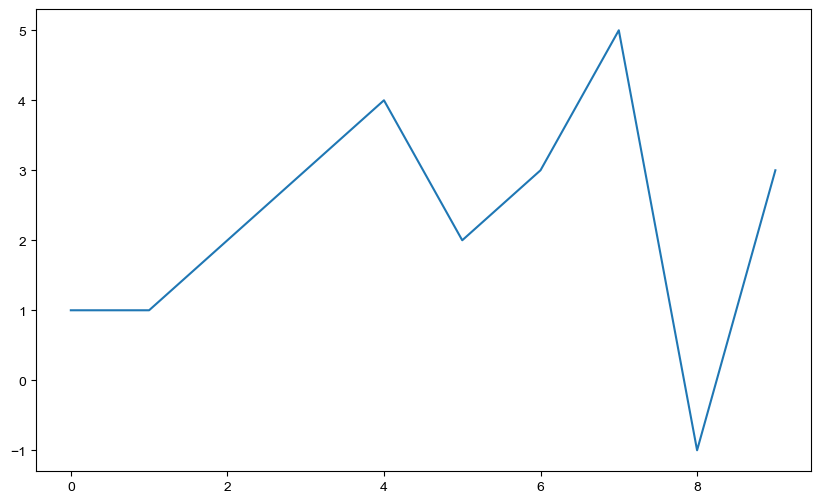

In [189]:
plt.figure(figsize=(10, 6)) 
plt.plot([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [1, 1, 2, 3, 4, 2, 3, 5, -1, 3])
plt.show()

### 예제1 : 그래프 기초

#### 삼각함수 그리기
- np.arange(a, b, s): a부터 b까지 s의 간격
- np.sin(value)

In [192]:
import numpy as np

In [193]:
t = np.arange(0, 12, 0.01)
y = np.sin(t)

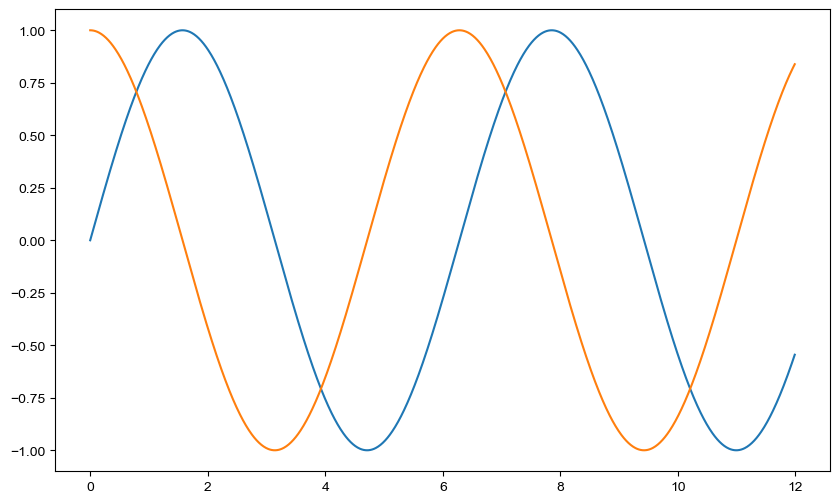

In [194]:
plt.figure(figsize=(10, 6))
plt.plot(t, np.sin(t))
plt.plot(t, np.cos(t))
plt.show()

- 1. 격자무늬 추가
- 2. 그래프 제목 추가
- 3. x축, y축 제목 추가
- 4. 주황색, 파란색 선 데이터 의미 구분 

In [204]:
def drawGraph():

    plt.figure(figsize=(10, 6))
    plt.plot(t, np.sin(t), label = "sin")
    plt.plot(t, np.cos(t), label = "cos")
    plt.grid(True) 
    plt.legend(loc="upper right") #범례
    plt.title("Example of sinewave")
    plt.xlabel("Time")
    plt.ylabel("Amplitude") #진폭
    plt.show()



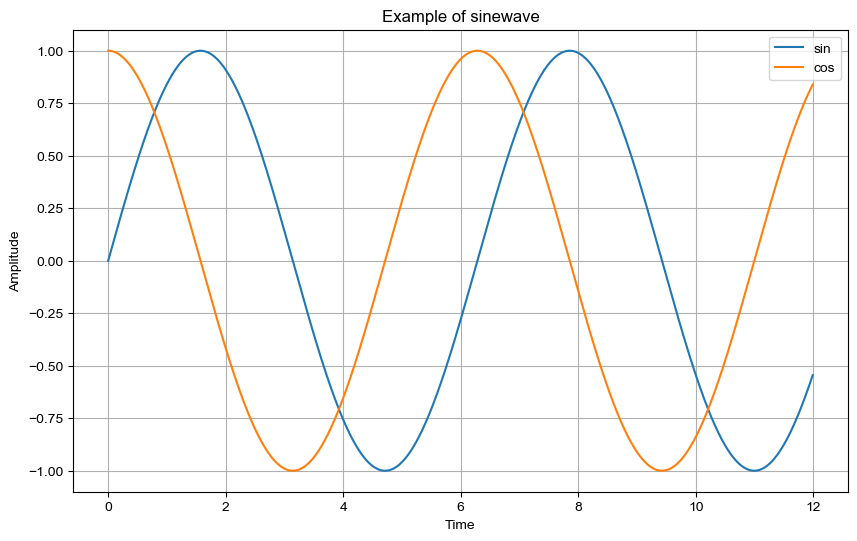

In [205]:
drawGraph()

### 예제2 : 그래프 커스텀

In [206]:
t = np.arange(0, 5, 0.5)
t

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

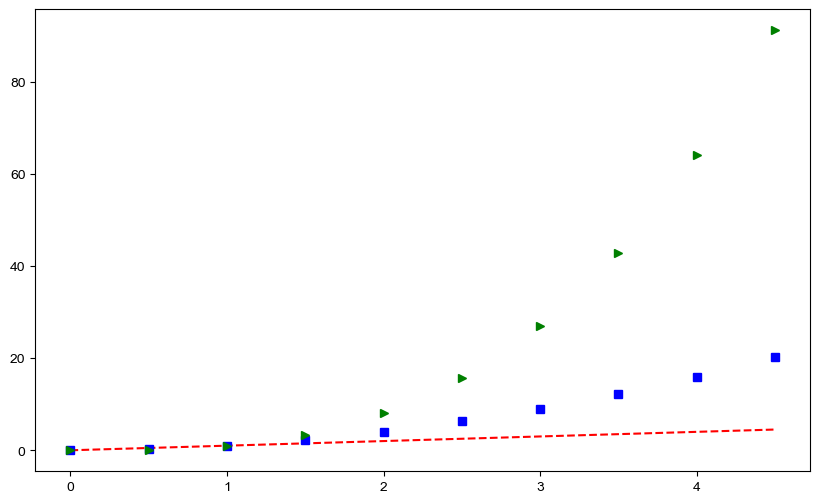

In [208]:
plt.figure(figsize=(10,6))
plt.plot(t, t, "r--") # red ---- 
plt.plot(t, t**2, "bs")
plt.plot(t, t**3, "g>")
plt.show()

In [210]:
# t = [0, 1, 2, 3, 4, 5, 6]
t = list(range(0, 7))
y = [1, 4, 5, 8, 9 , 5, 3]

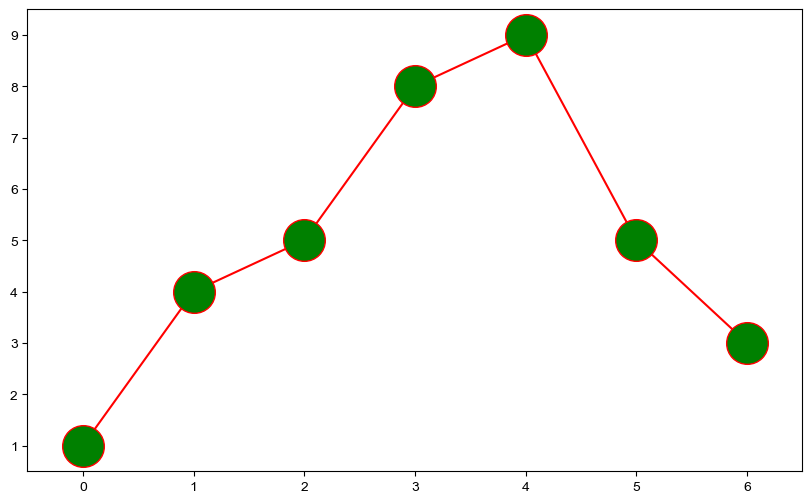

In [223]:
def drawGraph():

    plt.figure(figsize=(10, 6))
    plt.plot(
        t,
        y,
        color="red",
        linestyle="-",
        marker="o",
        markerfacecolor="green",
        markersize=30,
    )

    plt.xlim([-0.5, 6.5])
    plt.ylim([0.5, 9.5])
    
drawGraph()

### 예제3: scatter plot

In [226]:
t = np.array(range(0,10))
y = np.array([9, 8, 7 , 9, 8 , 3, 2, 4, 3, 4])

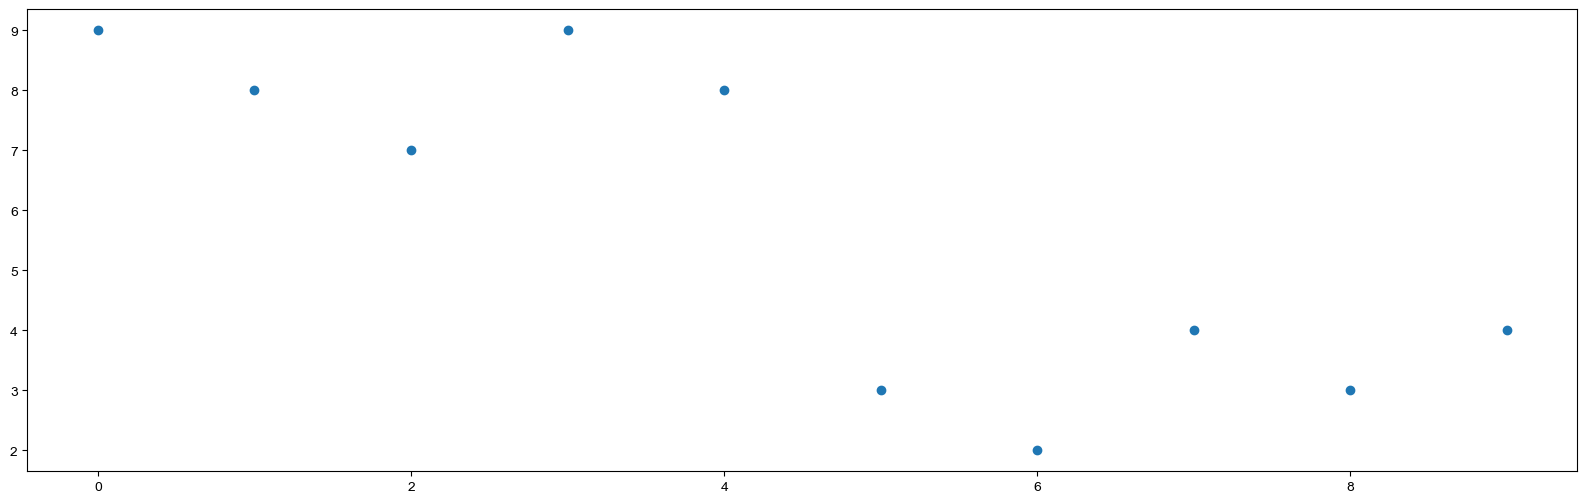

In [229]:
def drawGraph():

    plt.figure(figsize=(20,6))
    plt.scatter(t, y)
    plt.show()
    
drawGraph()

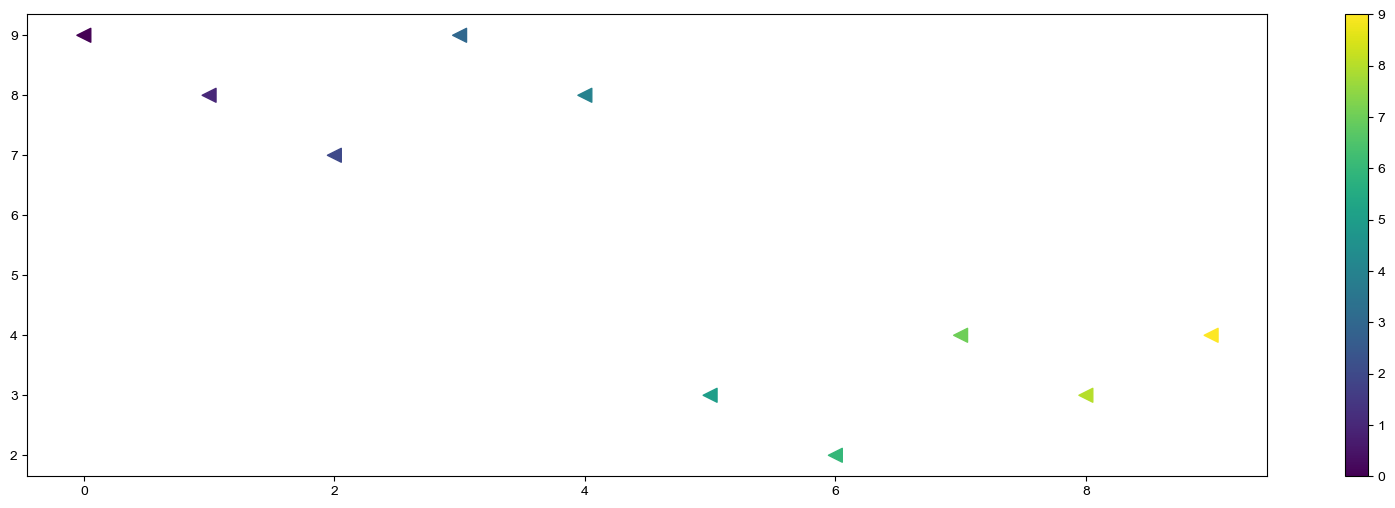

In [231]:
colormap = t
def drawGraph():

    plt.figure(figsize=(20,6))
    plt.scatter(t, y, s= 100, c=colormap, marker="<")
    plt.colorbar()
    plt.show()
    
drawGraph()

### 예제4: Pandas에서 plot 그리기
- matplotlib을 가져와서 사용합니다.

In [232]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854


<Axes: xlabel='구별'>

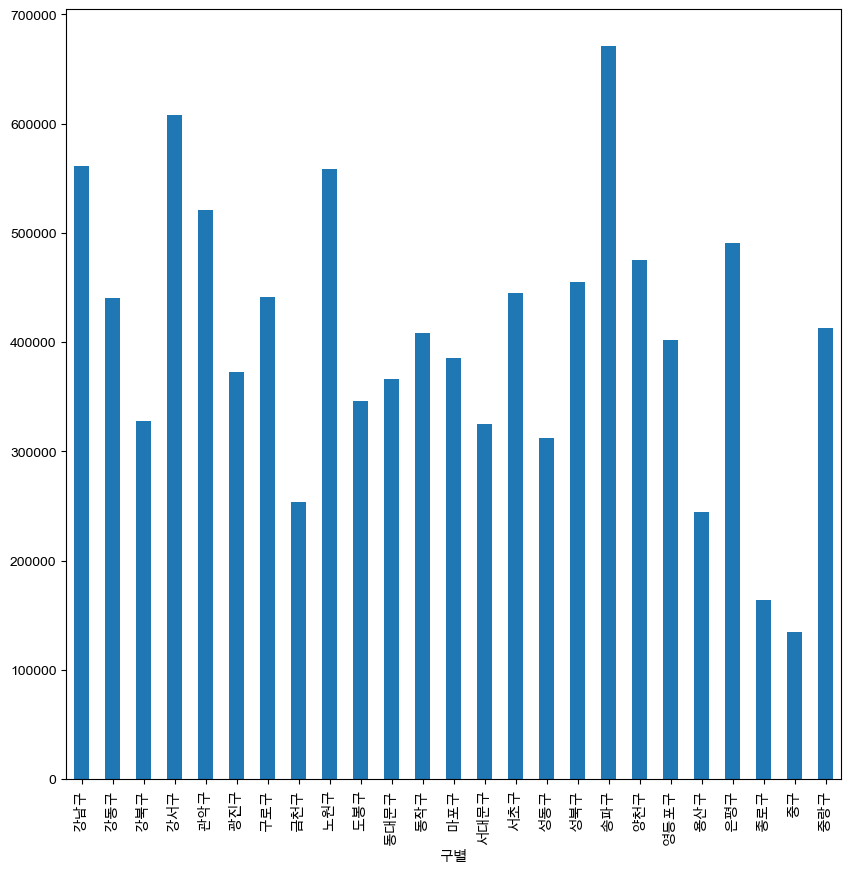

In [235]:
data_result["인구수"].plot(kind='bar', figsize=(10,10))

<Axes: ylabel='구별'>

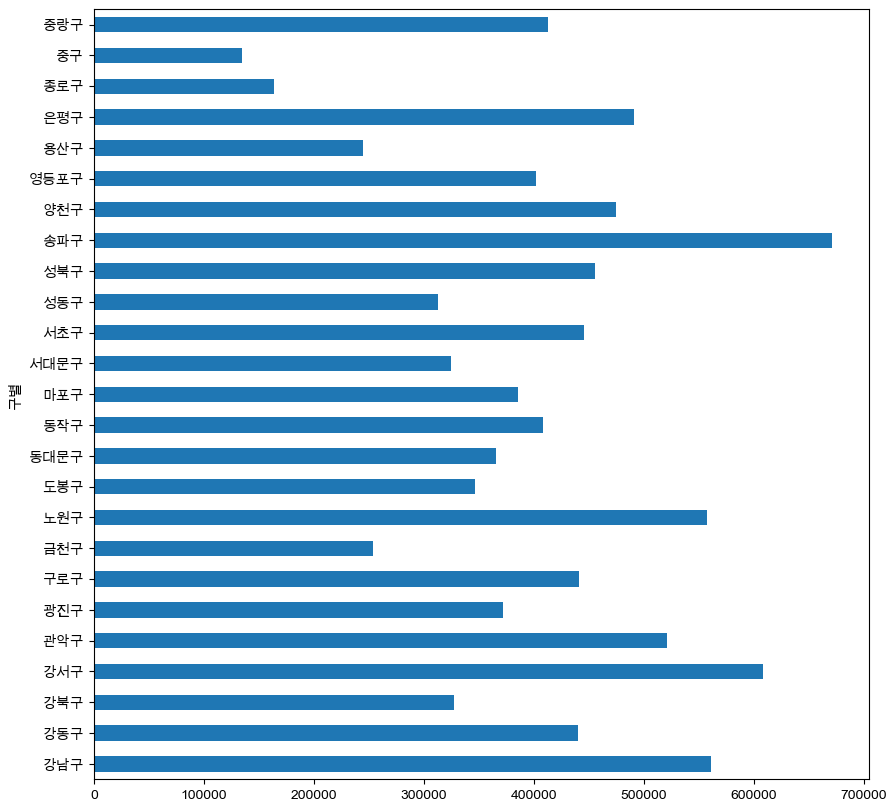

In [236]:
data_result["인구수"].plot(kind="barh", figsize=(10,10))

--------------------------------------------------------------------------------------------------------------

## 5. 데이터 시각화

In [238]:
import matplotlib.pyplot as plt
#import matplotlib as mpl
from matplotlib import rc

plt.rcParams["axes.unicode_minus"] = False # 마이너스 부호 때문에 한글이 꺠질 수가 있어 주는 설정
rc("font", family="Arial Unicode MS") # Window는 Malgun Gothic
# %matplotlin inline  또는 
get_ipython().run_line_magic("matplotlib", "inline") # 주피터 노트북에서 바로 그리기 위함

In [239]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854


#### 소계 컬럼 시각화

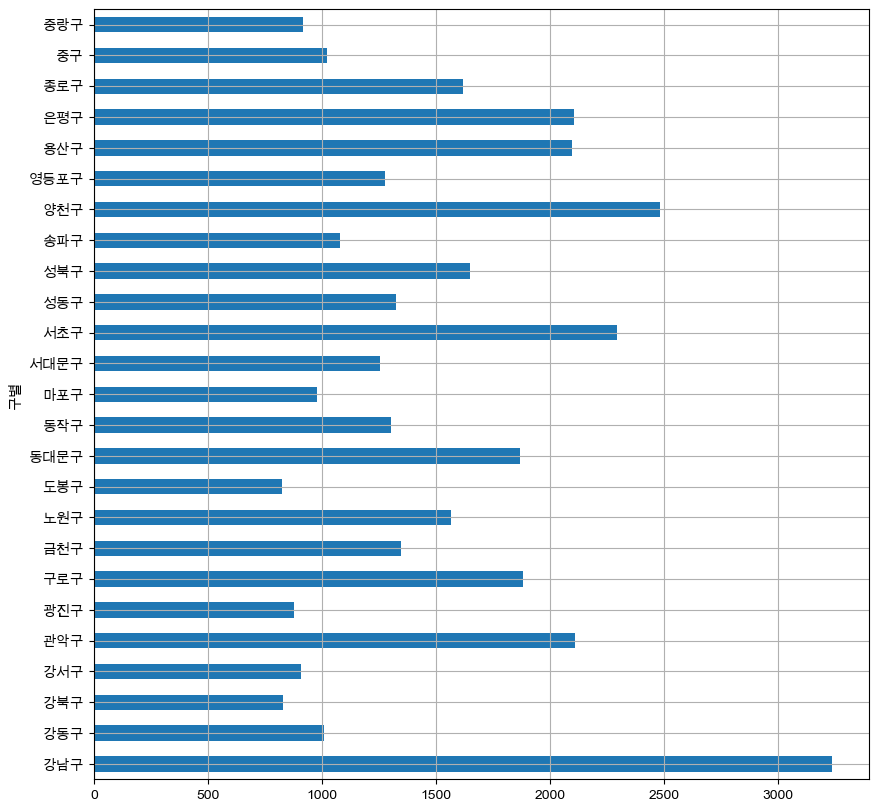

In [240]:
data_result["소계"].plot(kind="barh", grid=True, figsize=(10, 10));

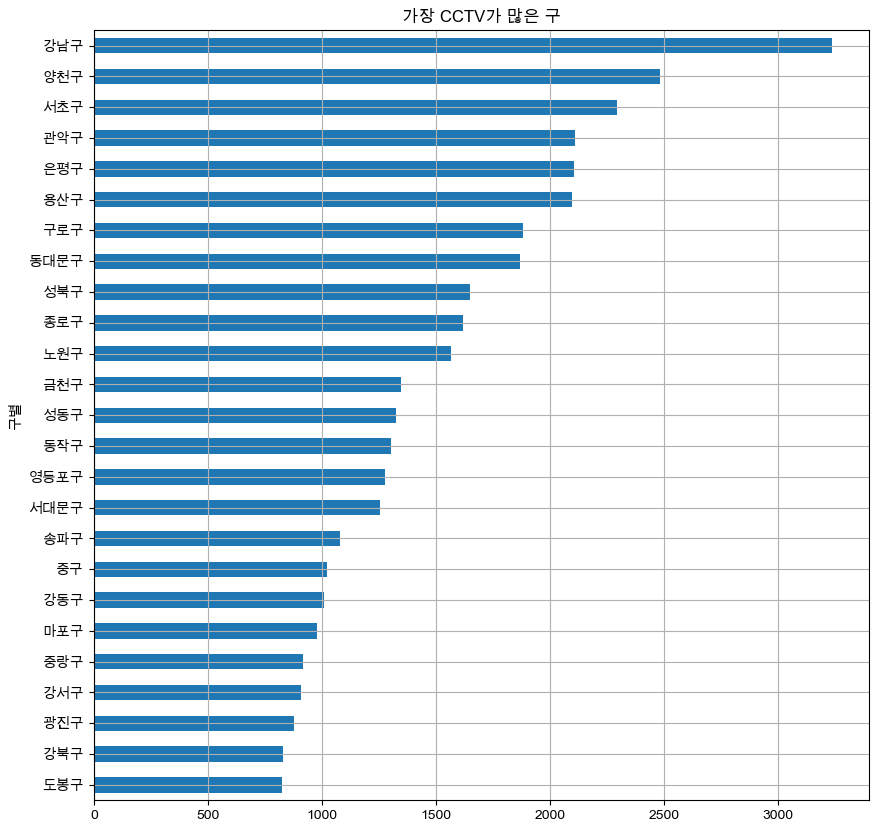

In [241]:
# 정렬 후 다시 시각화
def drawGraph():
    data_result["소계"].sort_values().plot(
        kind="barh", grid=True, title="가장 CCTV가 많은 구", figsize=(10, 10));

drawGraph()

In [242]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854


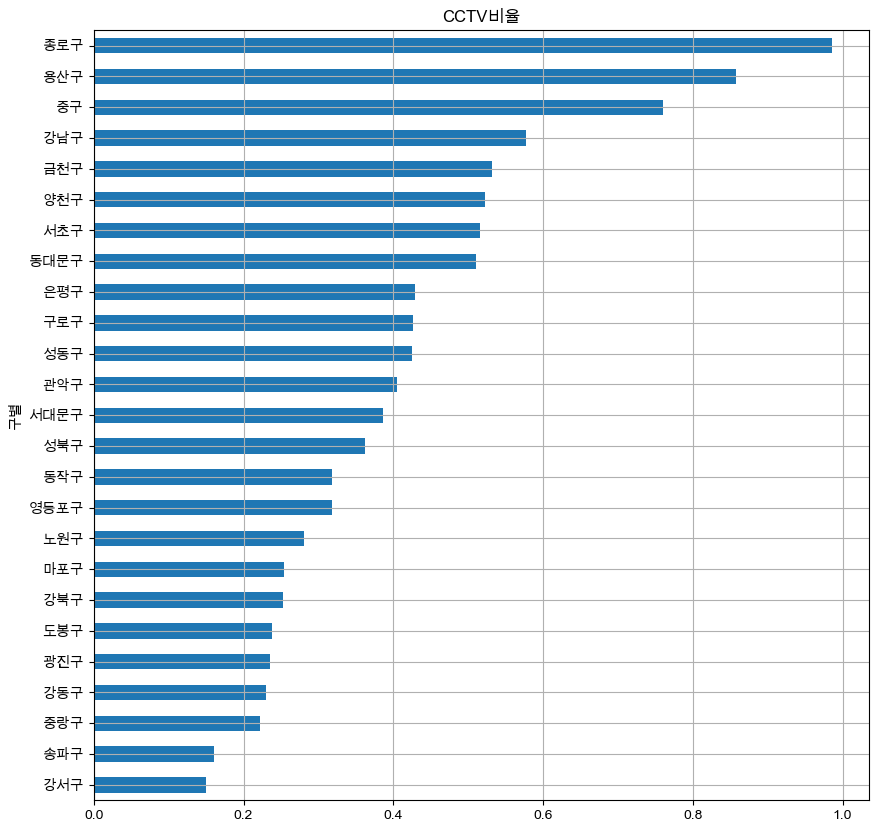

In [244]:
# 다른 컬럼 시각화
def drawGraph():
    data_result["CCTV비율"].sort_values().plot(
        kind="barh", grid=True, title="CCTV비율", figsize=(10, 10));

drawGraph()

------------------------------------------------------------------------------------------------------------

## 6. 데이터 경향 표시

In [245]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854


#### 인구수와 소계 컬럼으로 scatter plot 그리기

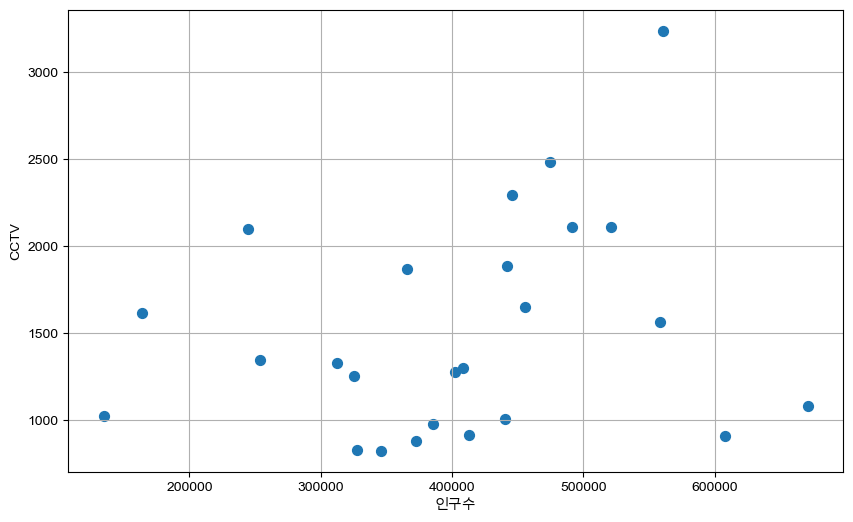

In [246]:
def drawGraph():
    
    plt.figure(figsize=(10, 6))
    plt.scatter(data_result["인구수"], data_result["소계"], s=50)
    plt.xlabel("인구수")
    plt.ylabel("CCTV")
    plt.grid(True)
    plt.show()
drawGraph()

#### Numpy를 이용한 1차 직선 만들기
- np.polyfit(): 직선을 구성하기 위한 계수를 계산
- np.polyld(): polyfit으로 찾은 계수로 파이썬에서 사용할 수 있는 함수로 만들어주는 기능 

In [247]:
import numpy as np

In [248]:
#두 변수에 대한 직선의 계수 계산
fp1 = np.polyfit(data_result["인구수"], data_result["소계"], 1)
fp1

array([1.11155868e-03, 1.06515745e+03])

In [249]:
f1 = np.poly1d(fp1)
f1

poly1d([1.11155868e-03, 1.06515745e+03])

- 인구가 40만인 구에서 서울시의 전체 경향에 맞는 적당한 CCTV 수는 ? 에 답이 가능해짐

In [566]:
f1(400000)

1509.7809252413335

- 경향선을 그리기 위한 x 데이터 생성
- np.linsapce(a, b, n): a부터 b까지 n개의 등간격 데이터 생성

In [251]:
fx = np.linspace(100000, 700000, 100)
fx

array([100000.        , 106060.60606061, 112121.21212121, 118181.81818182,
       124242.42424242, 130303.03030303, 136363.63636364, 142424.24242424,
       148484.84848485, 154545.45454545, 160606.06060606, 166666.66666667,
       172727.27272727, 178787.87878788, 184848.48484848, 190909.09090909,
       196969.6969697 , 203030.3030303 , 209090.90909091, 215151.51515152,
       221212.12121212, 227272.72727273, 233333.33333333, 239393.93939394,
       245454.54545455, 251515.15151515, 257575.75757576, 263636.36363636,
       269696.96969697, 275757.57575758, 281818.18181818, 287878.78787879,
       293939.39393939, 300000.        , 306060.60606061, 312121.21212121,
       318181.81818182, 324242.42424242, 330303.03030303, 336363.63636364,
       342424.24242424, 348484.84848485, 354545.45454545, 360606.06060606,
       366666.66666667, 372727.27272727, 378787.87878788, 384848.48484848,
       390909.09090909, 396969.6969697 , 403030.3030303 , 409090.90909091,
       415151.51515152, 4

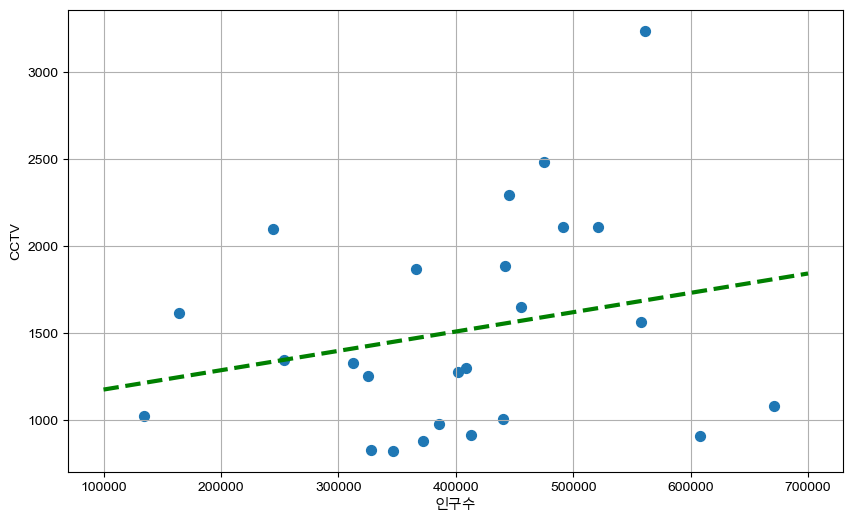

In [253]:
def drawGraph():
    
    plt.figure(figsize=(10, 6))
    plt.scatter(data_result["인구수"], data_result["소계"], s=50)
    plt.plot(fx, f1(fx), ls="dashed", lw=3, color="g") # 경향선 
    plt.xlabel("인구수") 
    plt.ylabel("CCTV")
    plt.grid(True)
    plt.show()
drawGraph()

## 7. 강조하고 싶은 데이터를 시각화해보자


### 그래프 다듬기
#### 경향과의 오차 만들기
- 경향(trend)과의 오차를 만들자
- 경향은 f1 함수에 해당 인구를 입력
- f1(data_result["인구수"])

In [254]:
fp1 = np.polyfit(data_result["인구수"],data_result["소계"], 1)
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

In [256]:
data_result.head(3)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352


In [257]:
data_result["오차"] = data_result["소계"] - f1(data_result["인구수"])

In [259]:
data_result.head(1)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.87122,11.596073,0.57713,1549.200326


In [264]:
# 경향과 비교해서 데이터의 오차가 너무 나는 데이터를 계산

df_sort_f = data_result.sort_values(by="오차",ascending=False) # 내림차순
df_sort_t = data_result.sort_values(by="오차",ascending=True) # 오름차순

In [265]:
# 경향 대비 CCTV를 많이 가진 구 
df_sort_f.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130,1549.200326
양천구,2482,34.671731,475018,471154,3864,55234,0.813443,11.627770,0.522507,888.832166
용산구,2096,53.216374,244444,229161,15283,36882,6.252148,15.088118,0.857456,759.128697
서초구,2297,63.371266,445401,441102,4299,53205,0.965198,11.945415,0.515715,736.753199
은평구,2108,85.237258,491202,486794,4408,74559,0.897390,15.178888,0.429151,496.842700


In [266]:
# 경향 대비 CCTV를 적게 가진 구 
df_sort_t.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773,-830.268578
송파구,1081,104.347826,671173,664496,6677,76582,0.994825,11.410173,0.161061,-730.205628
도봉구,825,246.638655,346234,344166,2068,53488,0.597284,15.448512,0.238278,-625.016861
중랑구,916,79.960707,412780,408226,4554,59262,1.103251,14.356800,0.221910,-607.986645
광진구,878,53.228621,372298,357703,14595,43953,3.920247,11.805865,0.235833,-600.988527


In [272]:
from matplotlib.colors import ListedColormap

# colormap을 사용자 정의(user define)로 세팅
color_step = ["#e74c3c", "#2ecc71", "#95a9a6", "#2ecc71", "#3498db", "#3498db"]
my_cmap = ListedColormap(color_step)


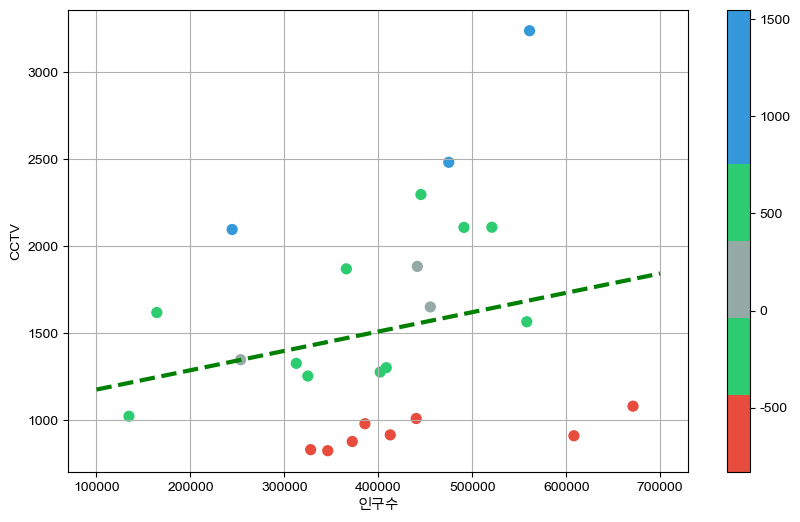

In [275]:
def drawGraph():
    
    plt.figure(figsize=(10, 6))
    plt.scatter(data_result["인구수"], data_result["소계"], s=50, c=data_result["오차"], cmap=my_cmap)
    plt.plot(fx, f1(fx), ls="dashed", lw=3, color="g") # 경향선
    plt.xlabel("인구수") 
    plt.ylabel("CCTV")
    plt.colorbar()
    plt.grid(True)
    plt.show()
drawGraph()

In [278]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130,1549.200326
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358,-544.642322
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352,-598.750923
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773,-830.268578
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854,464.799395


In [279]:
data_result["인구수"][0]

561052

In [280]:
data_result["소계"][0]

3238

In [281]:
data_result.index[0]

'강남구'

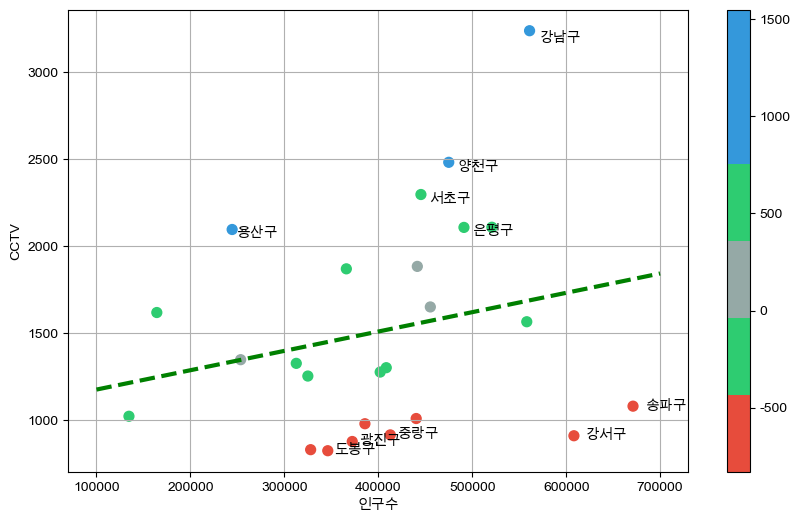

In [290]:
def drawGraph():
    
    plt.figure(figsize=(10, 6))
    plt.scatter(data_result["인구수"], data_result["소계"], s=50, c=data_result["오차"], cmap=my_cmap)
    plt.plot(fx, f1(fx), ls="dashed", lw=3, color="g") # 경향선

    for n in range(5):
        # 상위 5개
        plt.text(
            df_sort_f["인구수"][n] * 1.02, # x좌표
            df_sort_f["소계"][n] * 0.98, # y좌표
            df_sort_f.index[n], # title
            fontsize=10
            )
        # 하위 5개
        plt.text(
            df_sort_t["인구수"][n] * 1.02,
            df_sort_t["소계"][n] * 0.98,
            df_sort_t.index[n] ,
            fontsize=10
        )
    
    plt.xlabel("인구수") 
    plt.ylabel("CCTV")
    plt.colorbar()
    plt.grid(True)
    plt.show()
drawGraph()

In [291]:
data_result.to_csv("../data/01. Seoul_CCTV.csv", sep=",", encoding="utf-8")